**Manually Calculating Retention**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the  fictional dataset.
'parse_dates' specifies which columns in the CSV should be parsed as datetime objects


In [5]:

df=pd.read_csv('RetentionDataset.csv',parse_dates=['day'])
print('We have '+str(len(df))+' rows in our dataframe')
print("We have "+str(df['user_id'].nunique())+" number of unique users")
df.head()


We have 300777 rows in our dataframe
We have 15114 number of unique users


,user_id,day,active
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1
1,a58cd768-1318-47f7-bea4-09982e6f5479,2020-01-26,1
2,5d6bb30f-b525-4860-9704-8d06e1a42bad,2020-01-03,1
3,5ce8faec-7390-47da-b861-c621bf7077d3,2020-01-26,1
4,2d7bdd44-0cc0-46b7-b247-4be58cfd327c,2020-01-05,1


Step 1.
**Finding the first day your user was active**

In [6]:
#Group by user_id(to find all the dates a specific user was active)
#and find the minimum date for each one
start_date=df.groupby('user_id')['day'].min()
#renaming the column 
start_date=start_date.rename('start_day')
start_date.head()

user_id
0001143b-9583-4e9c-bcbf-958d5416bcc1   2020-07-07
00030b74-3f01-4ea7-9632-a58bfee36c46   2020-05-17
00039164-0c53-472b-b053-3bfbc3a12762   2020-06-23
000726bd-f312-4612-8ceb-4ca028dfb57c   2020-05-12
00090bcd-d7e9-470f-9d46-d80c81fa9d78   2020-04-17
Name: start_day, dtype: datetime64[ns]

In [7]:
#Join that data onto your original table
#here 'left_on' specififes the column used as the key for merging


df=pd.merge(df,start_date,left_on='user_id',right_index=True)
df.head(15) # grouped and sorted by user_id and it's start_day

# if you will want to drop the column later use this:
#df.drop('start_day_y',axis=1,inplace=True)



,user_id,day,active,start_day
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1,2020-01-20
15114,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-21,1,2020-01-20
25773,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-22,1,2020-01-20
41779,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-24,1,2020-01-20
71184,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-29,1,2020-01-20
126823,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-12,1,2020-01-20
139477,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-16,1,2020-01-20
230818,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-03-23,1,2020-01-20
273207,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-04-13,1,2020-01-20
1,a58cd768-1318-47f7-bea4-09982e6f5479,2020-01-26,1,2020-01-26


Step 2. **For each row, calculate the 'days since start day'**

In [8]:
#here "dt.days" is used to extract the number of days from a Pandas datetime object
df['days_since_start']=(df['day']-df['start_day']).dt.days
df.head(15)

,user_id,day,active,start_day,days_since_start
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1,2020-01-20,0
15114,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-21,1,2020-01-20,1
25773,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-22,1,2020-01-20,2
41779,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-24,1,2020-01-20,4
71184,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-29,1,2020-01-20,9
126823,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-12,1,2020-01-20,23
139477,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-16,1,2020-01-20,27
230818,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-03-23,1,2020-01-20,63
273207,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-04-13,1,2020-01-20,84
1,a58cd768-1318-47f7-bea4-09982e6f5479,2020-01-26,1,2020-01-26,0


Step 3.**Calculate the 'weeks since the start'**

even though some users didnt start on the same day i can compare their number of days since the start.
therefore, for example, i can see how many users where active 4 days since they started using our app


- `df['start_week']`:  creates a new column i

- `df.apply(...)`: This applies a function to each row of the DataFrame.

- `lambda x: (x['start_day'] - pd.Timedelta(x['start_day'].dayofweek, unit='day')).date()`:

  - `x['start_day']`: Accesses the value in the 'start_day' column for the current row.
  - `x['start_day'].dayofweek`: Gets the day of the week (0 for Monday, 1 for Tuesday, etc.) for the 'start_day'.
  - `pd.Timedelta(x['start_day'].dayofweek, unit='day')`: Represents the time difference in days based on the day of the week.
  - `x['start_day'] - pd.Timedelta(...)`: Subtracts the time difference from the 'start_day', effectively moving back to the start of the week.
  - `.date()`: Extracts the date part of the result.

for example:
The user started on thhe 26th of january. That day was a Tuesday, since we found out that the week started on the 25th of January. Today "day" is 28th of January, therefore, we are still on the same week and weeks_since_start==0

user_id	                                 day	      active	       start_day	 days_since_start  start_week	weeks_since_start
a58cd768-1318-47f7-bea4-09982e6f5479	2020-01-28		     1	        2020-01-26	            0	     2020-01-25	    0.0

In [13]:
#Extract the start week
df['start_week'] = df.apply(lambda x: (x['start_day'] - pd.Timedelta(x['start_day'].dayofweek, u='day')).date(), axis=1)

#  the output was not a datetime so I'm converting it into one.
df['start_week'] = pd.to_datetime(df['start_week'])

# Get the number of weeks since the user started
df['weeks_since_start'] = np.floor((df['day'] - df['start_week']) / np.timedelta64(1, 'W'))

,user_id,day,active,start_day,days_since_start,start_week,weeks_since_start
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1,2020-01-20,0,2020-01-20,0.0
15114,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-21,1,2020-01-20,1,2020-01-20,0.0
25773,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-22,1,2020-01-20,2,2020-01-20,0.0
41779,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-24,1,2020-01-20,4,2020-01-20,0.0
71184,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-29,1,2020-01-20,9,2020-01-20,1.0
126823,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-12,1,2020-01-20,23,2020-01-20,3.0
139477,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-16,1,2020-01-20,27,2020-01-20,3.0
230818,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-03-23,1,2020-01-20,63,2020-01-20,9.0
273207,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-04-13,1,2020-01-20,84,2020-01-20,12.0
1,a58cd768-1318-47f7-bea4-09982e6f5479,2020-01-26,1,2020-01-26,0,2020-01-25,0.0


Step 4.**Calculate the 'months since the start'**

- .astype('datetime64[M]'): Converts the values to datetime64 format at the monthly frequency ('M'). This effectively truncates the dates to the beginning of the month.

In [34]:
# Extract start month
df['start_month'] = df['start_day'].values.astype('datetime64[M]')

# Get the number of months since the user started
df['months_since_start'] = np.floor((df['day'] - df['start_month']) / (np.timedelta64(1, 'W'))/4)

In [18]:
df.head()

,user_id,day,active,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1,2020-01-20,0,2020-01-20,0.0,2020-01-20,0
15114,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-21,1,2020-01-20,1,2020-01-20,0.0,2020-01-20,0
25773,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-22,1,2020-01-20,2,2020-01-20,0.0,2020-01-20,0
41779,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-24,1,2020-01-20,4,2020-01-20,0.0,2020-01-20,0
71184,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-29,1,2020-01-20,9,2020-01-20,1.0,2020-01-20,0


**Our goal is to plot the 40-day daily retention of everyone in the dataset**
I want to make sure i only look at users with 40 days worth of data

In [20]:

f1 = df['start_day'] < df['day'].max() - pd.Timedelta(days=40)
dff = df[f1]
len(dff)
dff.head(20)
#So for example for every user there are minimum of 40 days between the start_day and the last day they used the app
#          user_id	                               day	  active	start_day	days_since_start	start_week	weeks_since_start	start_month	months_since_start
#273207	cc81d6ba-a4e6-45ff-952f-ce1ea212a50f	2020-04-13	1	2020-01-20	      84	           2020-01-20	12.0	             2020-01-20	2


,user_id,day,active,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start
0,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-20,1,2020-01-20,0,2020-01-20,0.0,2020-01-20,0
15114,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-21,1,2020-01-20,1,2020-01-20,0.0,2020-01-20,0
25773,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-22,1,2020-01-20,2,2020-01-20,0.0,2020-01-20,0
41779,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-24,1,2020-01-20,4,2020-01-20,0.0,2020-01-20,0
71184,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-01-29,1,2020-01-20,9,2020-01-20,1.0,2020-01-20,0
126823,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-12,1,2020-01-20,23,2020-01-20,3.0,2020-01-20,0
139477,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-02-16,1,2020-01-20,27,2020-01-20,3.0,2020-01-20,0
230818,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-03-23,1,2020-01-20,63,2020-01-20,9.0,2020-01-20,2
273207,cc81d6ba-a4e6-45ff-952f-ce1ea212a50f,2020-04-13,1,2020-01-20,84,2020-01-20,12.0,2020-01-20,2
1,a58cd768-1318-47f7-bea4-09982e6f5479,2020-01-26,1,2020-01-26,0,2020-01-25,0.0,2020-01-26,0


Step 6 **Find how many users were still active 40 days out **

In [21]:
df.groupby('days_since_start')['user_id'].nunique().head(40)
#here we can see that there were 15114 users in the data set
#because 15114 were active on the day '0'-first day
# and only 2670 ppl were active on day 40

days_since_start
0     15114
1     10659
2      8566
3      7440
4      6722
5      6233
6      5839
7      5362
8      5249
9      4834
10     4692
11     4514
12     4304
13     4173
14     4118
15     3945
16     3830
17     3821
18     3667
19     3497
20     3502
21     3475
22     3267
23     3175
24     3159
25     3229
26     3091
27     3087
28     3103
29     3020
30     2875
31     2885
32     2886
33     2787
34     2759
35     2741
36     2729
37     2657
38     2683
39     2670
Name: user_id, dtype: int64

In [23]:
#find the percentage of users active on each day
df.groupby('days_since_start')['user_id'].nunique().head(40) / df['user_id'].nunique()
# here df['user_id'].nunique() is the overall number of users


days_since_start
0     1.000000
1     0.705240
2     0.566759
3     0.492259
4     0.444753
5     0.412399
6     0.386331
7     0.354770
8     0.347294
9     0.319836
10    0.310441
11    0.298663
12    0.284769
13    0.276102
14    0.272463
15    0.261016
16    0.253407
17    0.252812
18    0.242623
19    0.231375
20    0.231706
21    0.229919
22    0.216157
23    0.210070
24    0.209012
25    0.213643
26    0.204512
27    0.204248
28    0.205306
29    0.199815
30    0.190221
31    0.190883
32    0.190949
33    0.184399
34    0.182546
35    0.181355
36    0.180561
37    0.175797
38    0.177518
39    0.176657
Name: user_id, dtype: float64

Step 6 **Plot the 100 day daily user retention**


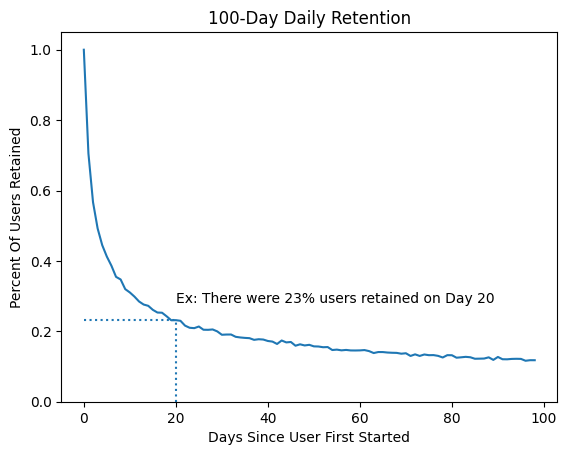

In [25]:
whole_retention = df.groupby('days_since_start')['user_id'].nunique() / df['user_id'].nunique()

plt.plot(whole_retention)
plt.title("100-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
# Set the limit of the y axis
plt.ylim(0,1.05)
#Horizonal lines
#y=whole_retention.loc[20], the value of the y coordinate of the horizontal line
#.loc[20]: It selects the value at index 20 from the DataFrame or Series.
plt.hlines(y=whole_retention.loc[20], xmin=0, xmax=20, linestyles='dotted')

#Vertical Lines
plt.vlines(x=20, ymin=0, ymax=whole_retention.loc[20], linestyles='dotted')

plt.text(s=("Ex: There were {:.0%} users retained on Day 20".format(whole_retention.loc[20])),
        x=20, y=whole_retention.loc[20] + .05);

Step 7 **100-Day Daily Retention  with Cohorting  by month**

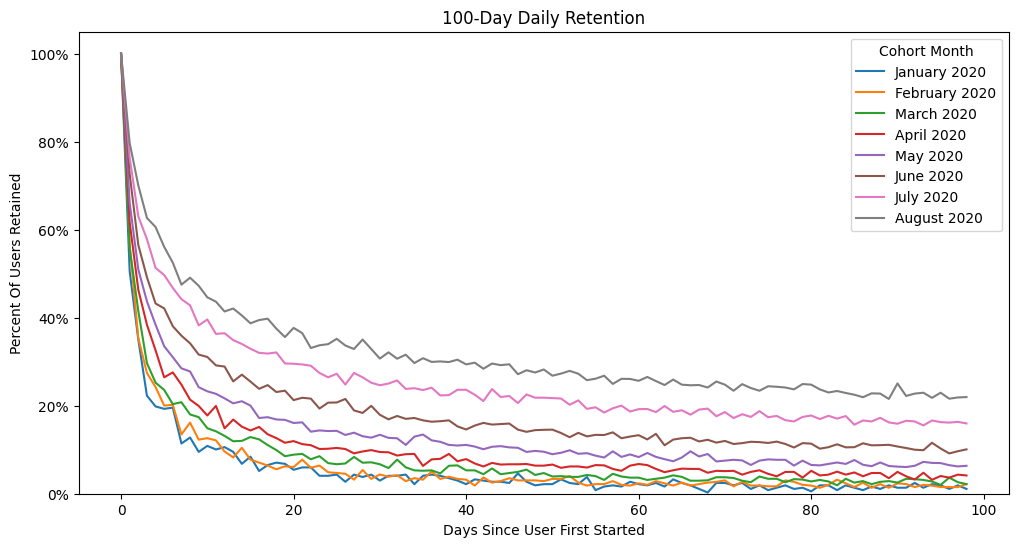

In [40]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12,6))
legend_x = 85
legend_y = .55

# For each start month you have, loop.
for i, month in enumerate(df['start_month'].unique()):
    
    # For each month, create a cohort df (dfc) that is filtered just for that month
    dfc = df[df['start_month']==pd.to_datetime(month)]

    # Then get your retention corhorts for that start month
    retention_cohort = dfc.groupby('days_since_start')['user_id'].nunique() / dfc['user_id'].nunique()
    
    # Extract month and year from the datetime object
    month_name = month.strftime('%B')
    year = month.year
    
    # Plot the cohort and add label for the legend
    p = plt.plot(retention_cohort, label=f'{month_name} {year}')

plt.legend(title='Cohort Month', loc='upper right')

plt.title("100-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)
def percent_formatter(x, _):
    return '{:.0%}'.format(x)
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.show()